In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")

import motiflets.motiflets as ml
from motiflets.competitors import *
from motiflets.plotting import *

import subprocess
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

#  Load fNIRS Dataset

Dataset Original Length n:  10401
Dataset Sampled Length n:  10401


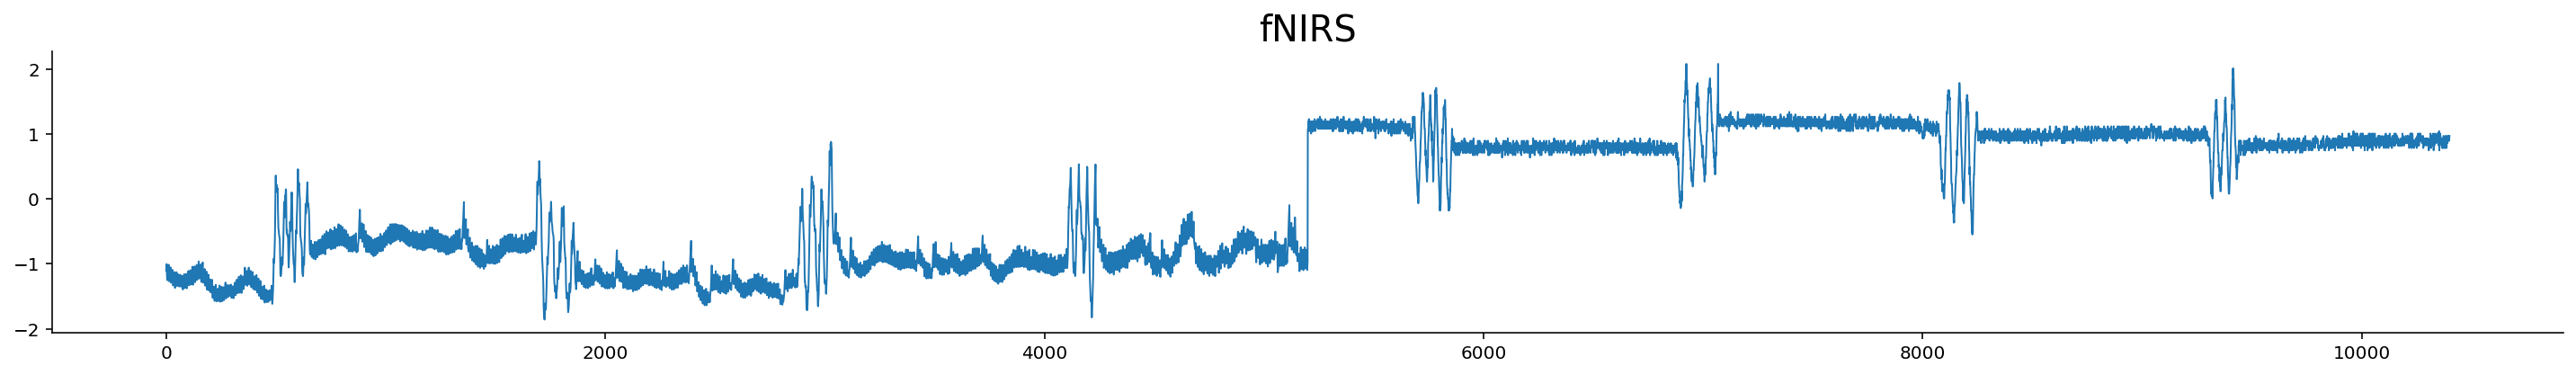

In [2]:
file = "fNIRS_subLen_600.csv" 
ds_name = "fNIRS"
series = ml.read_dataset_with_index(file) 
data = series.values
plot_dataset(file, series, ds_name=ds_name)

# Parameters

In [3]:
df = pd.DataFrame() # TOP-1
df2 = pd.DataFrame() # TOP-2
df_comp = pd.DataFrame(columns=["Method", "Motif", "Extent", "k"]) # Complete Info

rerun_all_jars = False
motif_length = 160
dataset = os.getcwd() + '/../datasets/' + file
print(dataset)

/Users/bzcschae/workspace/motiflets_paper/notebooks/../datasets/fNIRS_subLen_600.csv


# k-Motiflets

Compute ks: 100%|██████████| 18/18 [00:12<00:00,  1.42it/s]


Chosen window-size: 160


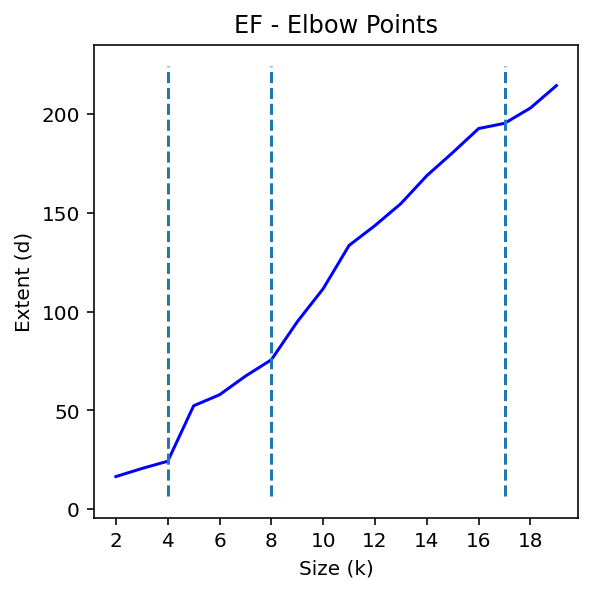

Identified Elbow Points [ 4  8 17]
Filtered Elbow Points [4, 17]


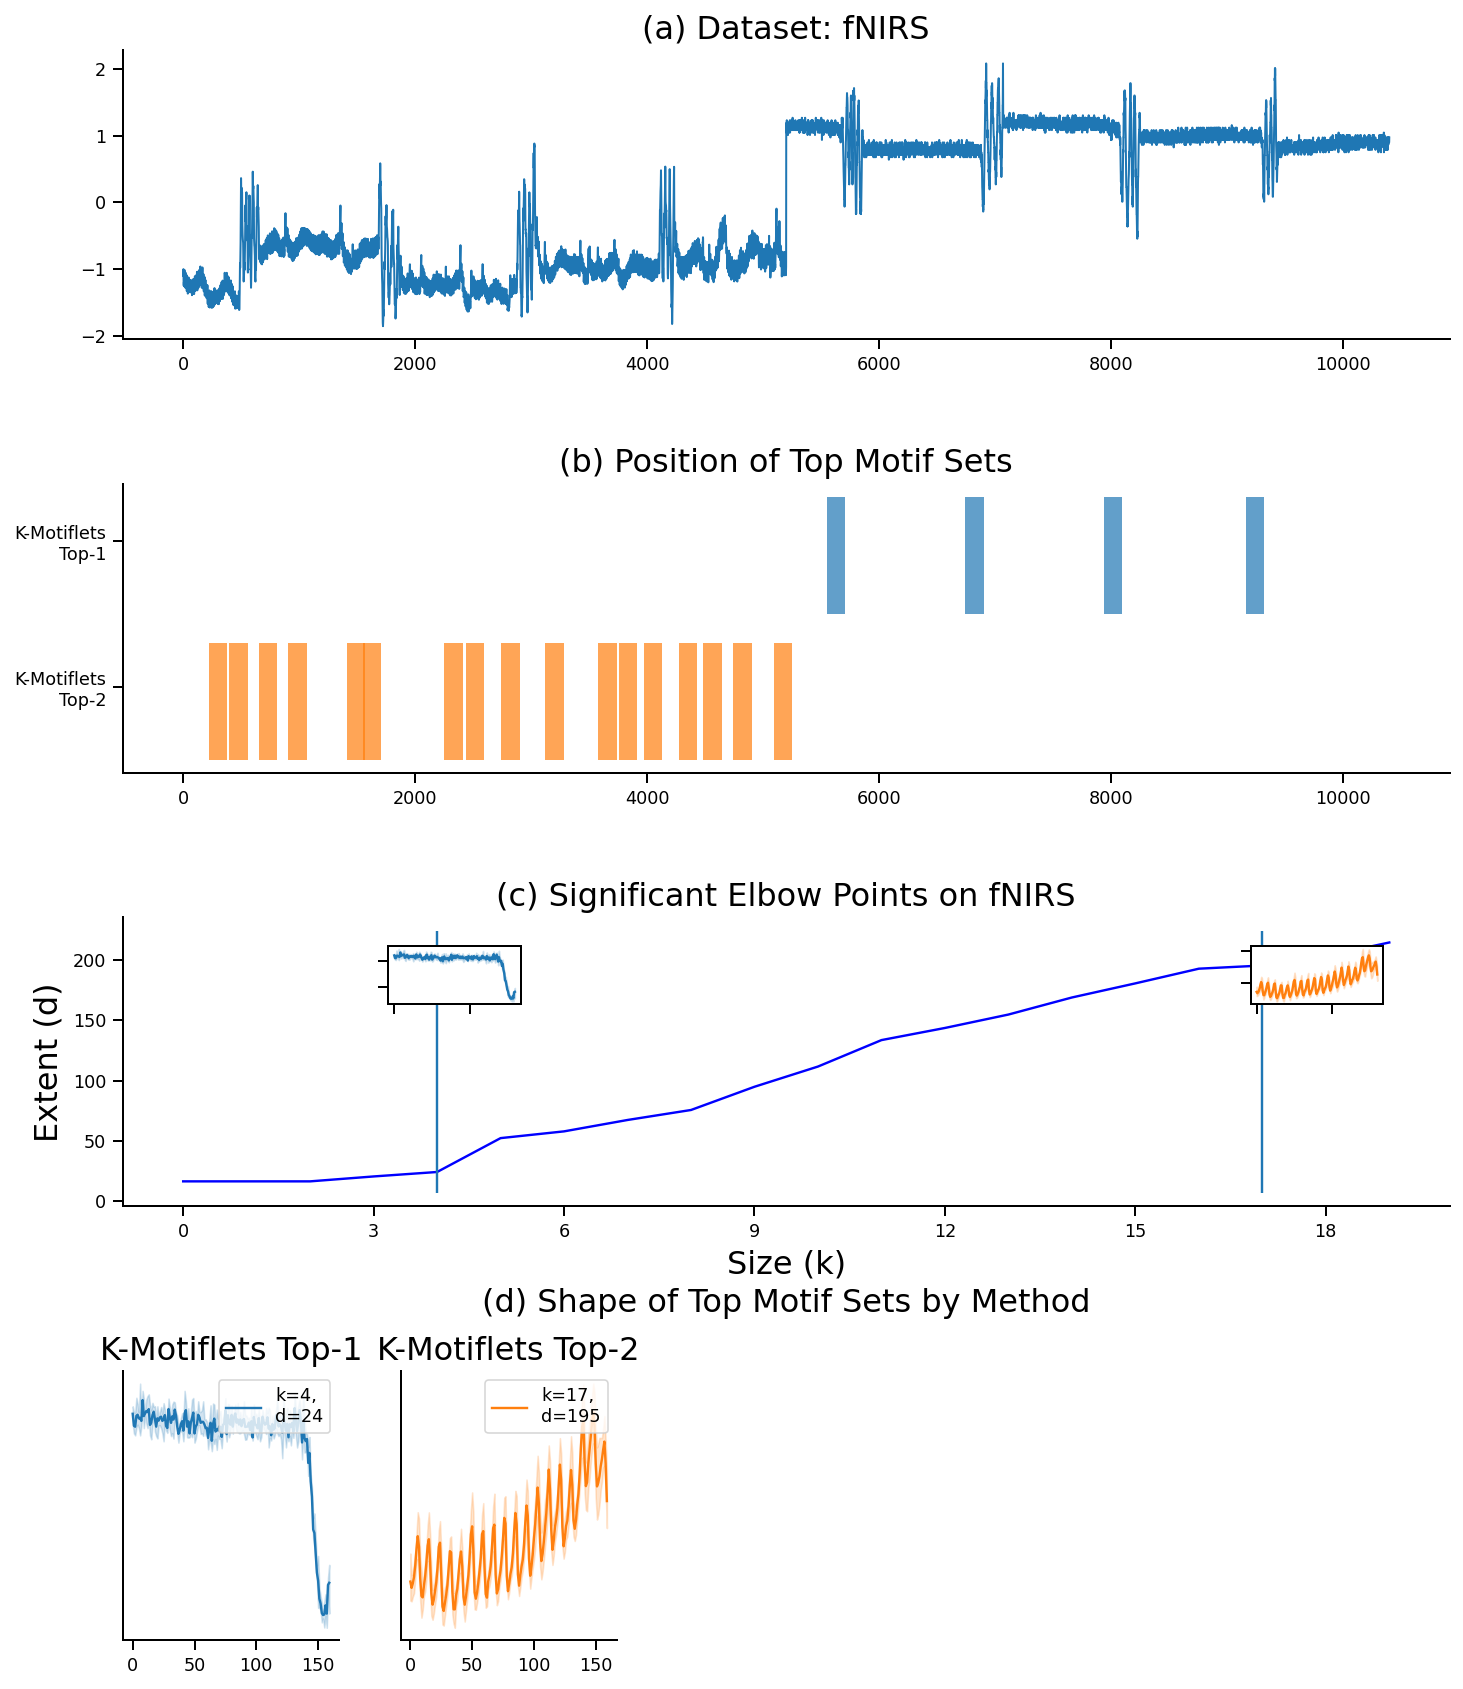

In [4]:
dists, motiflets, elbow_points = plot_elbow(
    20, series, file, ds_name=ds_name, plot_elbows=True,
    motif_length=motif_length, method_name="K-Motiflets")

In [5]:
D_full = ml.compute_distances_full(data, motif_length)

df["Motiflets Top-1"] = [motiflets[elbow_points[-1]]]
df2["Motiflets Top-2"] = [motiflets[elbow_points[-2]]]
df_comp = append_all_motif_sets(df_comp, motiflets, "Motiflets", D_full)

# Set Finder
Runs java code:
- https://sites.google.com/site/timeseriesmotifsets/

In [6]:
max_r = 80 #200 / 2
radii = np.arange(50, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/set_finder.jar',
       dataset,
       'SetFinder',
       str(list(radii)),
       str(motif_length)])

Radii [50 58 66 74]


r: 43.120552 d: 74.27737426757812
r: 58.600033 d: 105.98970031738281
r: 298.14032 d: 304.9312438964844
r: 75.983475 d: 151.26499938964844
Filtered Elbow Points [3]


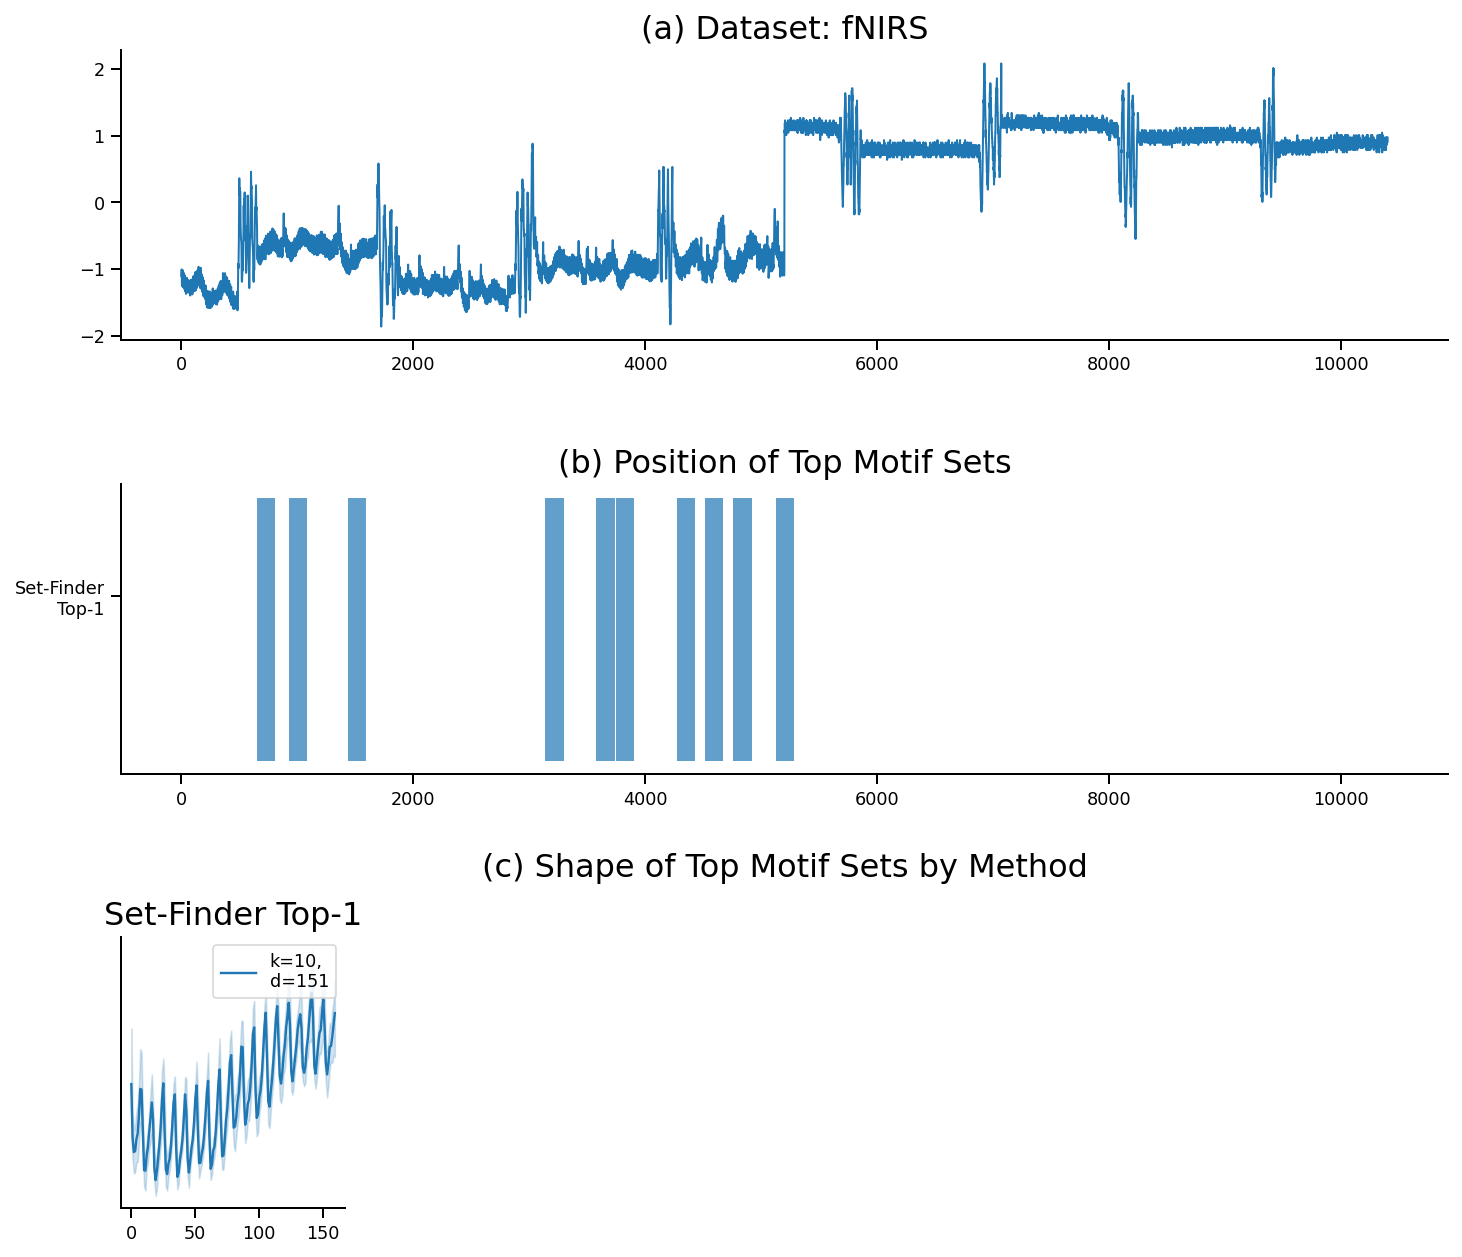

In [7]:
# run jave code first       
ms_set_finder = [
	[3765, 663, 3139, 4299, 4531, 4787],
	[247, 1430, 3131, 3589, 3757, 4292, 4523, 4761],
	[263, 1446, 2091, 3138, 3588, 3764, 4299, 4539, 4777],
	[3137, 652, 925, 1436, 3578, 3745, 4271, 4512, 4758, 5126],
]

motifset = plot_competitors(series, ds_name, ms_set_finder, motif_length, prefix="Set-Finder")

df["Set Finder Top-1"] = [motifset[-1]]
df2["Set Finder Top-2"] = [ms_set_finder[-4]]
df_comp = append_all_motif_sets(df_comp, ms_set_finder, "Set Finder", D_full)

# EMMA

Runs Java Code
- https://github.com/jMotif/SAX

In [8]:
max_r = 100
radii = np.arange(10, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/emma.jar',
       dataset,
       str(list(radii)),
       str(motif_length)])

Radii [ 10  20  30  40  50  60  70  80  90 100]


r: 28.294588 d: 28.294588088989258
r: 22.889065 d: 31.17637825012207
r: 47.675674 d: 54.374778747558594
r: 78.71542 d: 92.1212158203125
r: 78.71542 d: 79.98278045654297
r: 115.249245 d: 124.96908569335938
r: 142.42502 d: 187.34432983398438
r: 137.37782 d: 173.2378692626953
r: 133.554 d: 206.61756896972656
Filtered Elbow Points [1, 2, 5]


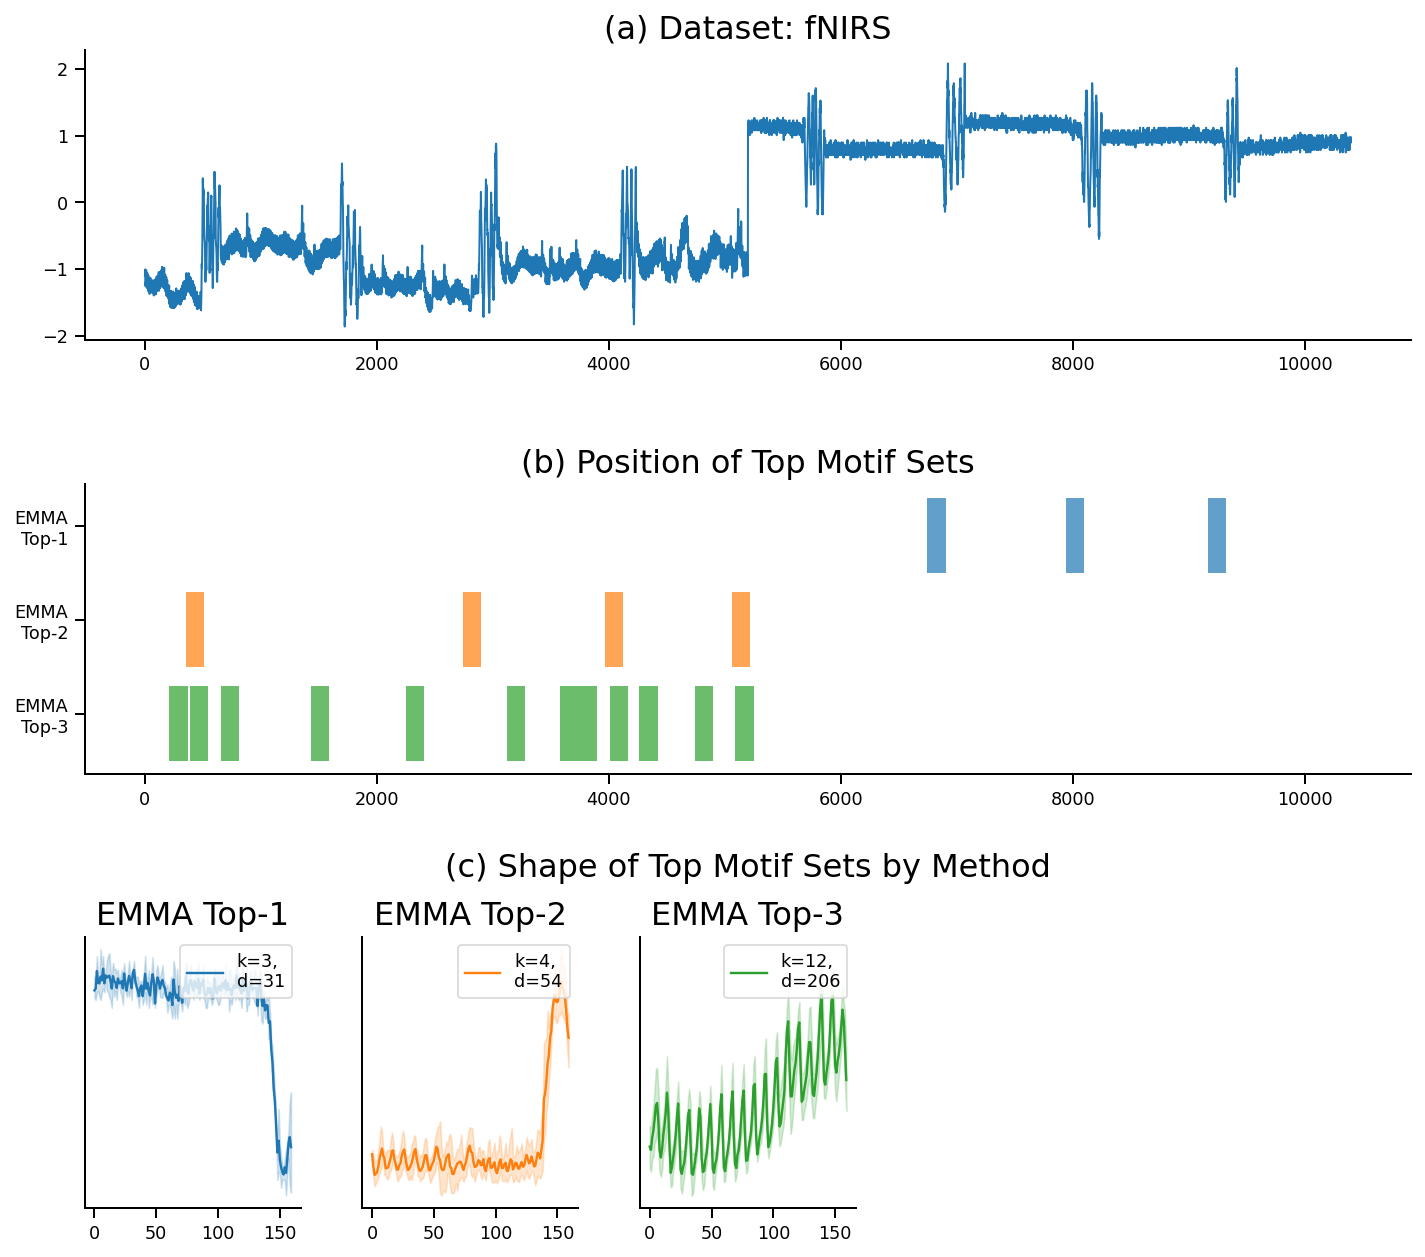

In [9]:
# run jave code first       
ms_emma = [
	[5560, 9176],
	[6745, 7938, 9166],
	[351, 2742, 3967, 5061],
	[345, 1539, 2733, 5056],
	[345, 1539, 2733, 5054],
	[653, 1410, 3128, 3578, 3746, 4262, 4494, 4733],
	[220, 395, 655, 3121, 3739, 4273, 4760, 5092],
	[211, 654, 918, 1421, 3580, 3739, 4264, 4504, 4734, 4814, 5118],
	[211, 387, 654, 1429, 2251, 3121, 3580, 3739, 4008, 4264, 4743, 5090],
]

motifset = plot_competitors(series, ds_name, ms_emma, motif_length, prefix="EMMA")

df["EMMA Top-1"] = [motifset[-1]]
df2["EMMA Top-2"] = [motifset[-3]]
df_comp = append_all_motif_sets(df_comp, ms_emma, "EMMA", D_full)

# Valmod Motif Sets
based on own (fixed-length) implementation

r: 16.468294 d: 16.468294143676758
r: 21.548365 d: 29.379528045654297
r: 139.20871 d: 139.20870971679688
Filtered Elbow Points [2]


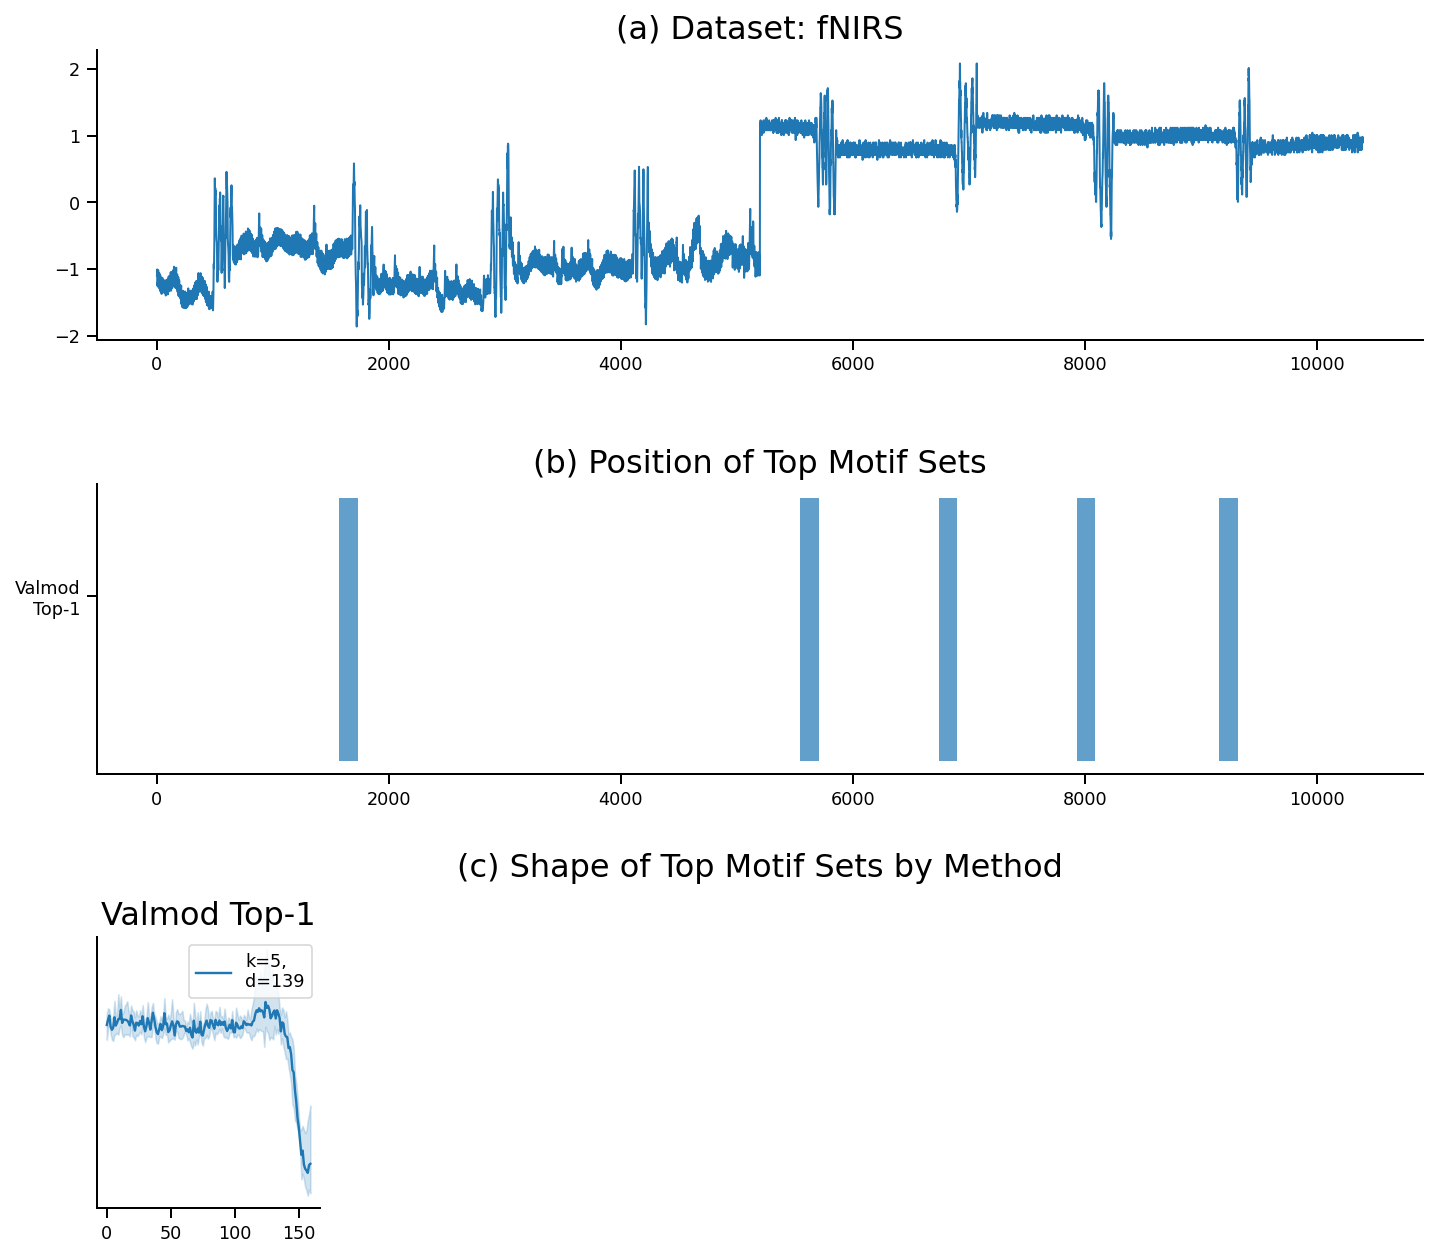

In [10]:
max_r = 160
data_raw = data.to_numpy() if isinstance(data, pd.Series) else data    
ms_valmod = [motifset for (motifset, _) in get_valmod_motif_set_ranged(data_raw, file, motif_length, max_r)]                                            
motifset = plot_competitors(series, ds_name, ms_valmod, motif_length, prefix="Valmod")

df["VALMOD Top-1"] = [motifset[-1]]
df2["VALMOD Top-2"] = [ms_valmod[-3]]
df_comp = append_all_motif_sets(df_comp, ms_valmod, "VALMOD", D_full)

# Learning Motifs
See Java Code

In [11]:
max_r = 100
radii = np.arange(50, max_r + 1, max(1, int(max_r / 10)))
print("Radii", radii)

if rerun_all_jars:
    output = subprocess.call(['java', '-jar', 
       '../jars/latent_motifs.jar',
       dataset,
       str(list(radii)),
       str(motif_length)])

Radii [ 50  60  70  80  90 100]


r: 93.71805 d: 112.453857421875
r: 165.28091 d: 166.348388671875
r: 167.8251 d: 167.82510375976562
r: 171.00688 d: 195.931640625
r: 137.2329 d: 205.70045471191406
Filtered Elbow Points [0, 2, 3]


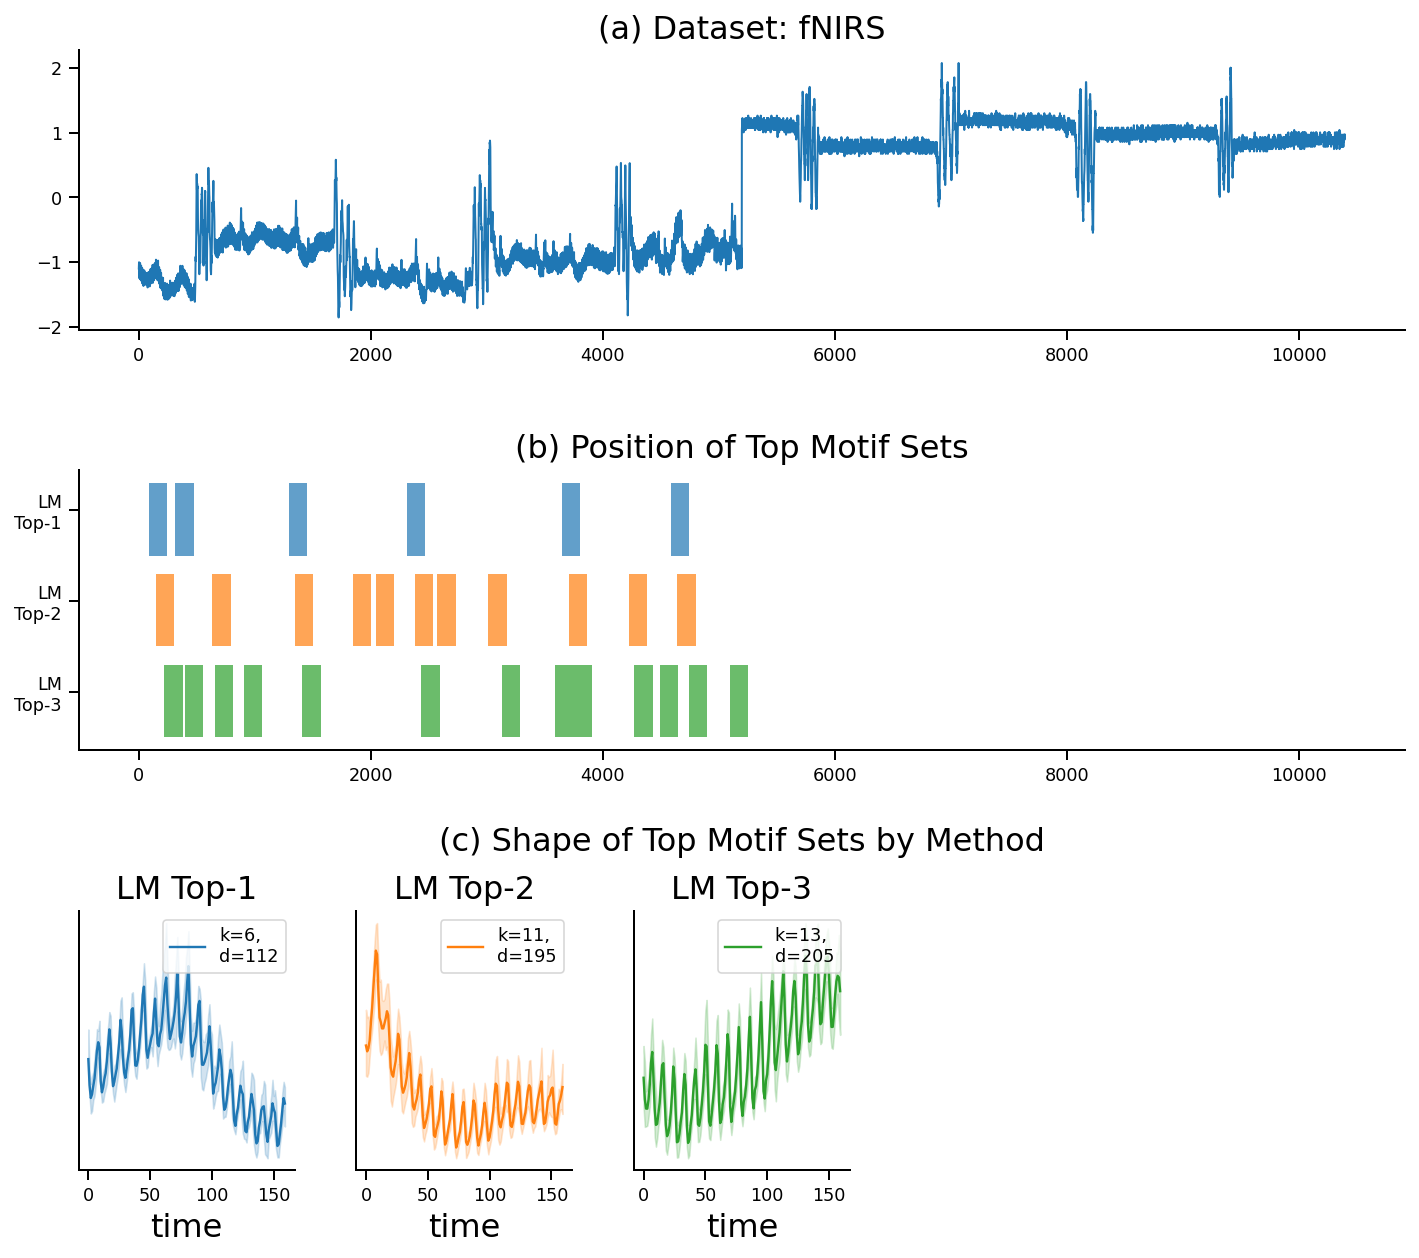

In [12]:
ms_learning_motifs = np.array([
	[84,313,1293,2310,3647,4589,],
	[133,1340,3009,4224,4632,],
	[148,633,1347,1848,2046,2380,3014,3710,4225,4653,],
	[147,633,1347,1847,2045,2379,2574,3013,3709,4224,4645,],
	[218,395,653,907,1411,2434,3128,3588,3746,4271,4494,4741,5098,],
#	[285,694,1121,1264,1963,2291,2492,2608,3188,3333,3619,3823,4349,4563,4836,5025,],
])

    
motifset = plot_competitors(data, ds_name, ms_learning_motifs, motif_length, prefix="LM")

df["LM Top-1"] = [motifset[-1]]
df2["LM Top-2"] = [motifset[-2]]
df_comp = append_all_motif_sets(df_comp, ms_learning_motifs, "LM", D_full)

# Comparison

In [13]:
df_all = (pd.concat([df, df2], axis=1)).T
df_all.rename(columns={0:"offsets"}, inplace=True)
df_all

,offsets
Motiflets Top-1,"[219, 4742, 1411, 4486, 3121, 3579, 4272, 908,..."
Set Finder Top-1,"[3137, 652, 925, 1436, 3578, 3745, 4271, 4512,..."
EMMA Top-1,"[211, 387, 654, 1429, 2251, 3121, 3580, 3739, ..."
VALMOD Top-1,"[1574, 5546, 6741, 7934, 9162]"
LM Top-1,"[218, 395, 653, 907, 1411, 2434, 3128, 3588, 3..."
Motiflets Top-2,"[5548, 6744, 7937, 9164]"
Set Finder Top-2,"[3765, 663, 3139, 4299, 4531, 4787]"
EMMA Top-2,"[6745, 7938, 9166]"
VALMOD Top-2,"[5553, 6749]"
LM Top-2,"[147, 633, 1347, 1847, 2045, 2379, 2574, 3013,..."


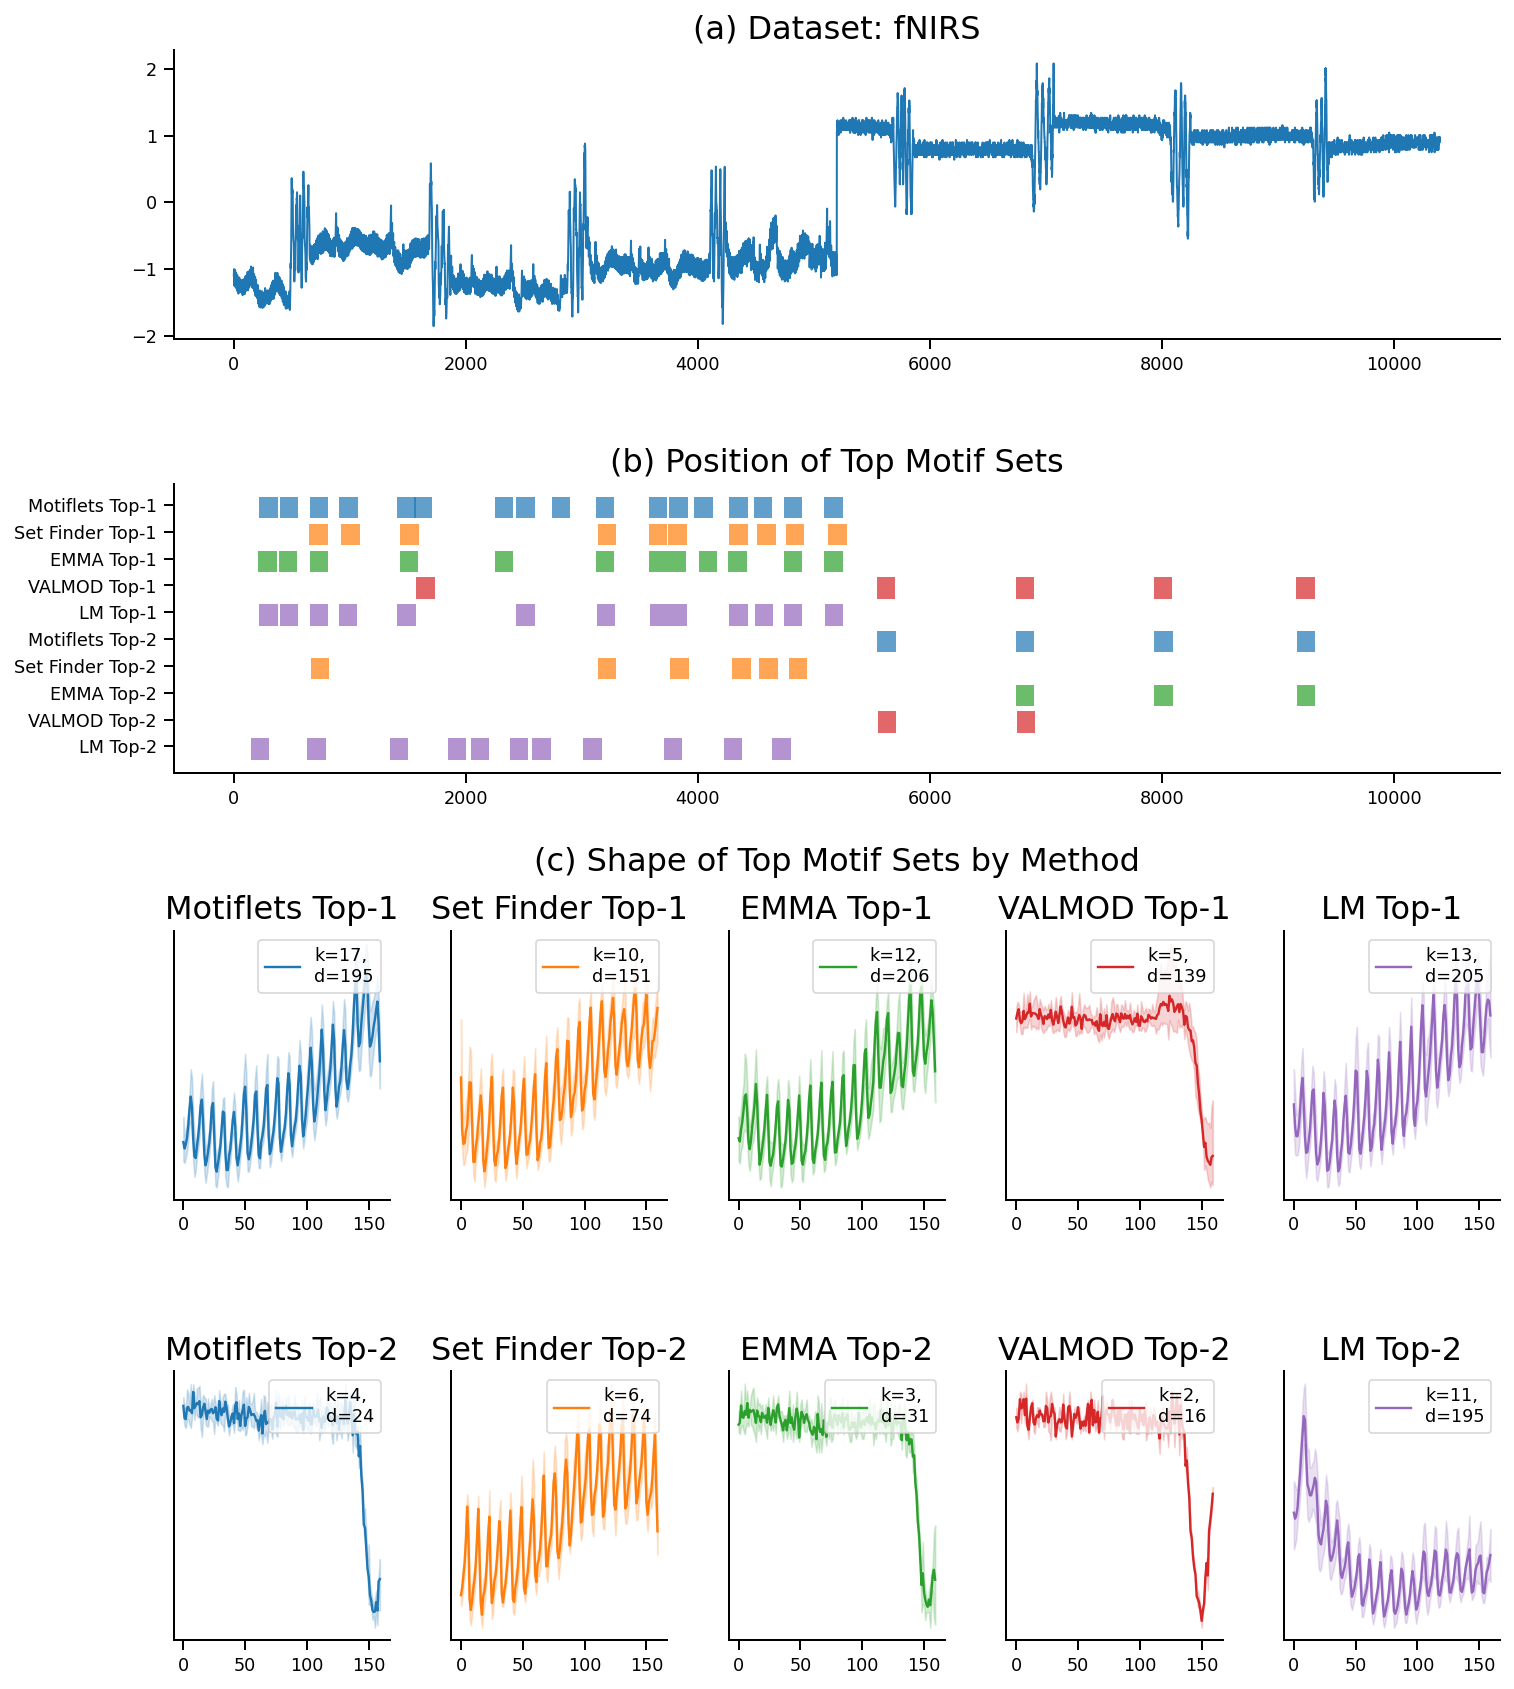

In [14]:
motifsets = np.array(df_all["offsets"].values)
plot_all_competitors(series, ds_name, motifsets, motif_length, 
                     method_names=df_all.index.values)

# Summary

In [15]:
df_2 = df.T
df_2.rename(columns={0:"offsets"}, inplace=True)
df_2

,offsets
Motiflets Top-1,"[219, 4742, 1411, 4486, 3121, 3579, 4272, 908,..."
Set Finder Top-1,"[3137, 652, 925, 1436, 3578, 3745, 4271, 4512,..."
EMMA Top-1,"[211, 387, 654, 1429, 2251, 3121, 3580, 3739, ..."
VALMOD Top-1,"[1574, 5546, 6741, 7934, 9162]"
LM Top-1,"[218, 395, 653, 907, 1411, 2434, 3128, 3588, 3..."


In [16]:
extent = [ml.get_pairwise_extent(D_full, df_2.offsets[ind]) for ind in df_2.index]
count = [len(df_2.offsets[ind]) for ind in df_2.index]

df_statistics = pd.DataFrame(
    data=zip(df_2.index, extent, count), 
    columns=["Method", "Extent (d)", "Size (k)"])
df_statistics["Dataset"] = ds_name
# df_statistics.set_index("Method", inplace=True)
display(df_statistics)

,Method,Extent (d),Size (k),Dataset
0,Motiflets Top-1,195.357895,17,fNIRS
1,Set Finder Top-1,151.264999,10,fNIRS
2,EMMA Top-1,206.617569,12,fNIRS
3,VALMOD Top-1,139.208710,5,fNIRS
4,LM Top-1,205.700455,13,fNIRS


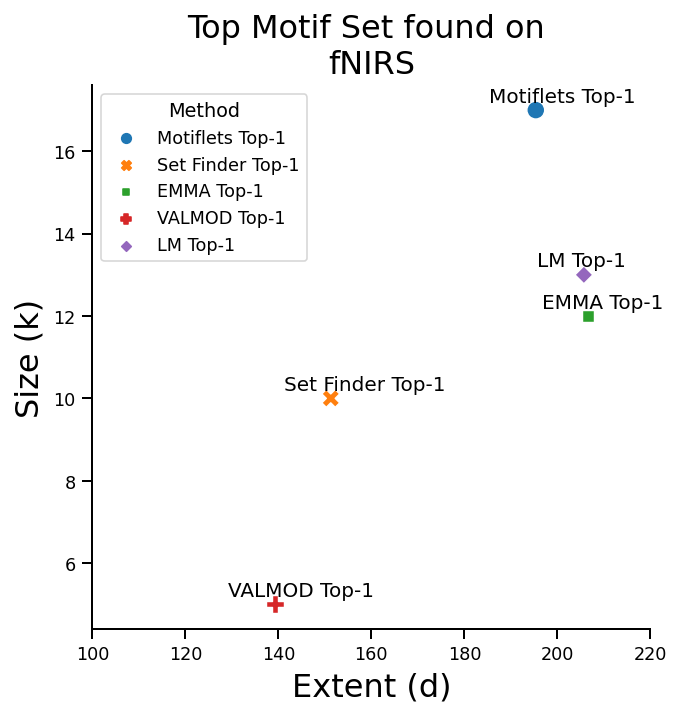

In [17]:
def annotate(ax, df):
    for ix, method, extent, cardinality, _ in df.itertuples():
        ax.annotate(
            method,
            (extent-10, cardinality+0.2),
            size = 10
        )

fig, ax = plt.subplots(figsize=(5,5))
sns.scatterplot(data=df_statistics, 
                x="Extent (d)", y="Size (k)", hue="Method", 
                style="Method", s=80, ax=ax)
annotate(ax, df_statistics)
ax.set_xlim([100, 220])
ax.set_title("Top Motif Set found on \n"+ ds_name)
ax.set_ylabel("Size (k)")
ax.set_xlabel("Extent (d)")
sns.despine()
fig.set_figheight(5)
fig.set_figwidth(5)
# plt.savefig("../images/" + ds_name.replace(" ", "-")  + "_compare.pdf", bbox_inches='tight')

# Compare Relationship between size and extent

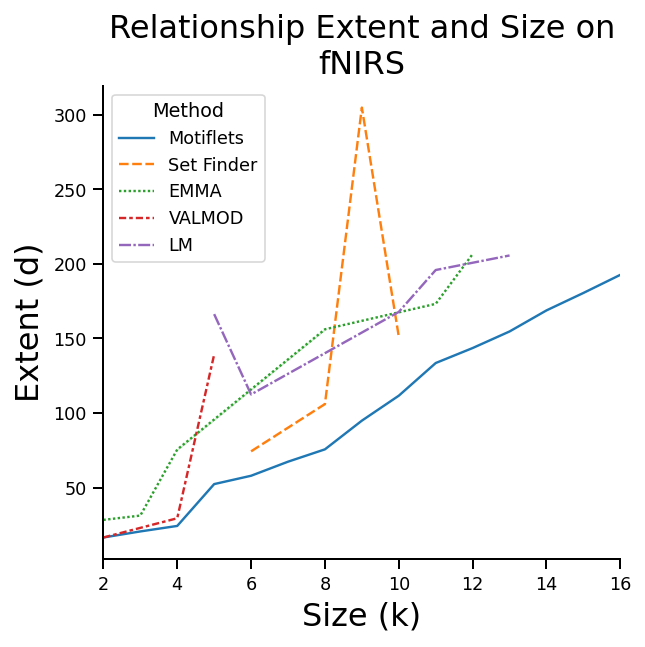

In [18]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(5,5))
ax.set_title("Relationship Extent and Size on\n" + ds_name)
sns.lineplot(x="k", y="Extent", data=df_comp, hue="Method", style="Method", ci=0)
sns.despine()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlim([2,16])
ax.set_xlabel("Size (k)")
ax.set_ylabel("Extent (d)")
plt.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(5)
# plt.savefig("../images/" + ds_name.replace(" ", "-")  + "_compare2.pdf", bbox_inches='tight')